In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import datetime as dt
from collections import Counter

In [2]:
round2 = pd.read_json("round2_merged.json")
# round3.drop(["Unnamed: 0", "Unnamed: 0.1"],axis=1, inplace=True)
print round2.columns
# round3.head()
print len(round2)
round2_clean = round2[["id", "host_id", "host_response_rate", "host_acceptance_rate", 
                       "host_total_listings_count", "monthly_price", "instant_bookable", 
                       "room_type", "bucket_name", "discount_asked", "nightly_price", 
                       "decision", "price_agreed", "discount_agreed", "percent_agreed",
                       "calendars", "price_requested", "number_of_reviews", "host_is_superhost"
                      ,"beds"]]
round2_clean["room_type"].head(5)

Index([u'Unnamed: 0', u'account', u'actions', u'availability', u'beds',
       u'bucket_name', u'calendars', u'decision', u'discount_agreed',
       u'discount_asked', u'discount_obtained', u'host_acceptance_rate',
       u'host_id', u'host_is_superhost', u'host_name', u'host_response_rate',
       u'host_response_time', u'host_total_listings_count', u'host_url', u'id',
       u'instant_bookable', u'listing_url', u'minimum_nights',
       u'monthly_price', u'nightly_price', u'nightly_price_scraped',
       u'number_of_reviews', u'openings', u'percent_agreed', u'price_agreed',
       u'price_requested', u'response', u'room_type'],
      dtype='object')
226


0         Private room
1      Entire home/apt
10     Entire home/apt
100       Private room
101       Private room
Name: room_type, dtype: object

In [3]:
round3 = pd.read_json("round3_merged.json")
print round3.columns

round3_clean = round3[["id", "host_id", "host_response_rate", "host_acceptance_rate", 
                       "host_total_listings_count", "monthly_price", "instant_bookable", 
                       "room_type", "bucket_name", "discount_asked", "nightly_price", 
                       "decision", "price_agreed", "discount_agreed", "percent_agreed",
                       "calendars", "price_requested", "number_of_reviews", "host_is_superhost"
                      ,"beds"]]

print len(round3_clean)
dataframes= [round2_clean, round3_clean]

round3_clean = pd.concat(dataframes)
print len(round3_clean)

Index([u'Unnamed: 0', u'account', u'actions', u'availability', u'beds',
       u'bucket_name', u'calendars', u'decision', u'discount_agreed',
       u'discount_asked', u'discount_obtained', u'extra_people',
       u'guests_included', u'host_acceptance_rate', u'host_id',
       u'host_is_superhost', u'host_name', u'host_response_rate',
       u'host_response_time', u'host_total_listings_count', u'host_url', u'id',
       u'instant_bookable', u'listing_url', u'minimum_nights',
       u'monthly_price', u'nightly_plus_guest_price', u'nightly_price',
       u'nightly_price_scraped', u'number_of_reviews', u'openings',
       u'percent_agreed', u'price_agreed', u'price_requested', u'response',
       u'room_type'],
      dtype='object')
288
514


In [4]:
round3_clean.head()
round3_clean['room_type'].head()

0         Private room
1      Entire home/apt
10     Entire home/apt
100       Private room
101       Private room
Name: room_type, dtype: object

### Cleaning

In [5]:
#compute price median and price_std
calendar_price =  np.array([(np.median(calendar["price_USD"].values()), np.std(calendar["price_USD"].values())) 
                            for calendar in round3_clean["calendars"].values])
calendar_median_price = calendar_price[:,0]
calendar_price_std = calendar_price[:,1]
round3_clean["price_median"]=calendar_median_price
round3_clean["price_std"]=calendar_price_std/calendar_median_price
#cleaning
for index, row in round3_clean.iterrows():
    elem = str(row["host_acceptance_rate"])
    try:
        round3_clean["host_acceptance_rate"][index]= int( elem[:-1]) 
    except:
        round3_clean["host_acceptance_rate"][index]= int(-1) 
    
    elem2 = str(row["host_response_rate"])    
    try:
        round3_clean["host_response_rate"][index]= int( elem2[:-1]) 
    except:
        round3_clean["host_response_rate"][index]= int(-1) 
    
    #not used
    elem3 = str(row["monthly_price"])
    try:
        round3_clean["monthly_price"][index]= int( elem3[1:]) 
    except:
        round3_clean["monthly_price"][index]= int(-1) 
    
    #not used
    #round3_clean["nightly_price"][index] = int(row[nightly_price])

    if row["host_is_superhost"] == "t":
        round3_clean["host_is_superhost"][index] = 1
    if row["host_is_superhost"] == "f":
        round3_clean["host_is_superhost"][index] = 0
    
    if row["room_type"]==  "Private room":
        round3_clean["room_type"][index] = 1
    elif row["room_type"]=="Entire home/apt":
        round3_clean["room_type"][index] = 0
    else:
        round3_clean["room_type"][index] = 2
        
        
print len(round3_clean)
round3_clean["room_type"].head(20)


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

514


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0      1
1      1
10     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    1
109    1
11     1
110    0
111    0
112    0
113    0
114    0
115    0
Name: room_type, dtype: object

### creating 3 dataframes, one for accepted listing, one for denied and one for not answered. The "not_answer" is less important, but it will be shown anyway in the distributions

In [6]:
round3_accepted= round3_clean
round3_denied= round3_clean
round3_not_answer= round3_clean

round3_accepted= round3_accepted.loc[round3_accepted['decision']==1]
round3_denied= round3_denied.loc[round3_denied['decision']==0]
round3_not_answer= round3_not_answer.loc[round3_not_answer['decision']==-1]
negatives= [round3_denied, round3_not_answer]
round3_all_negative= pd.concat(negatives)


print len(round3_accepted)
print len(round3_denied)
print len(round3_not_answer)
print len(round3_all_negative)
print len(round3_clean)

round3_accepted.head(3)

113
157
244
401
514


,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,monthly_price,instant_bookable,room_type,bucket_name,discount_asked,...,price_agreed,discount_agreed,percent_agreed,calendars,price_requested,number_of_reviews,host_is_superhost,beds,price_median,price_std
1,8516966,15728249,100,100,1,-1,f,1,days3_weeks1,0.9,...,185,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",185,1,0,4,210,0.000000
10,1079511,4524825,-1,-1,1,-1,f,0,daysM_weeksM,0.9,...,170,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",150,15,0,1,160,0.020952
103,10451994,53848488,93,0,1,-1,f,0,daysM_weeks2,0.9,...,80,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",80,1,0,1,90,0.188228


### Studying distributions

In [7]:
#functions for plotting distributions:


def plot_distribution( current_population, label_input, color_input= 'b'):
    fig = plt.figure(figsize=[15,4])
    plt.subplot(1,2,1)
    plt.hist(current_population['price_median'].values,bins=20, color=color_input)
    plt.xlabel('Price median')
    plt.ylabel('Number of Listings')
    plt.title('Distribution of Median Price for ' + label_input )
    # plt.xlim([50,1400])
    #plt.xticks(np.linspace(0,700,25))

    plt.grid(False)
    plt.legend()

    plt.subplot(1,2,2)

    plt.hist(current_population['price_std'].values, bins=25, color=color_input)

    plt.xlabel('Std deviation')
    plt.ylabel('Number of Listings')
    plt.title('Distribution of Standard Deviation of Price for ' + label_input)

    plt.legend()
    plt.grid(False)
    print "Total element in "+label_input+": "+ str(len(current_population))
    print "Percent Listings with No Price Change at All for "+ label_input+": ", len(current_population[current_population['price_std']==0])*1./len(current_population)
    return

#Function for plotting population of continuous intervals, divided by ranges

def plot_interval(current_population,field, ranges, label_input ):
    #intervals=[]
    for i in range(len(ranges)-1):
        current_range= current_population[current_population[field].isin([ranges[i],ranges[i+1]] )]
        current_label= label_input + " range: [" +str(ranges[i])+","+str(ranges[i+1])+"]"
        plot_distribution(current_range,current_label )
    return


In [8]:
from pandas.tools.plotting import scatter_matrix
round3_scat = round3_clean[["host_response_rate", "host_acceptance_rate", 
                       "host_total_listings_count",  "instant_bookable", 
                       "room_type",  "discount_asked", "nightly_price", 
                       "decision", 
                        "number_of_reviews", "host_is_superhost"
                      ,"beds"]]




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019683978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000020FE62B0>]], dtype=object)

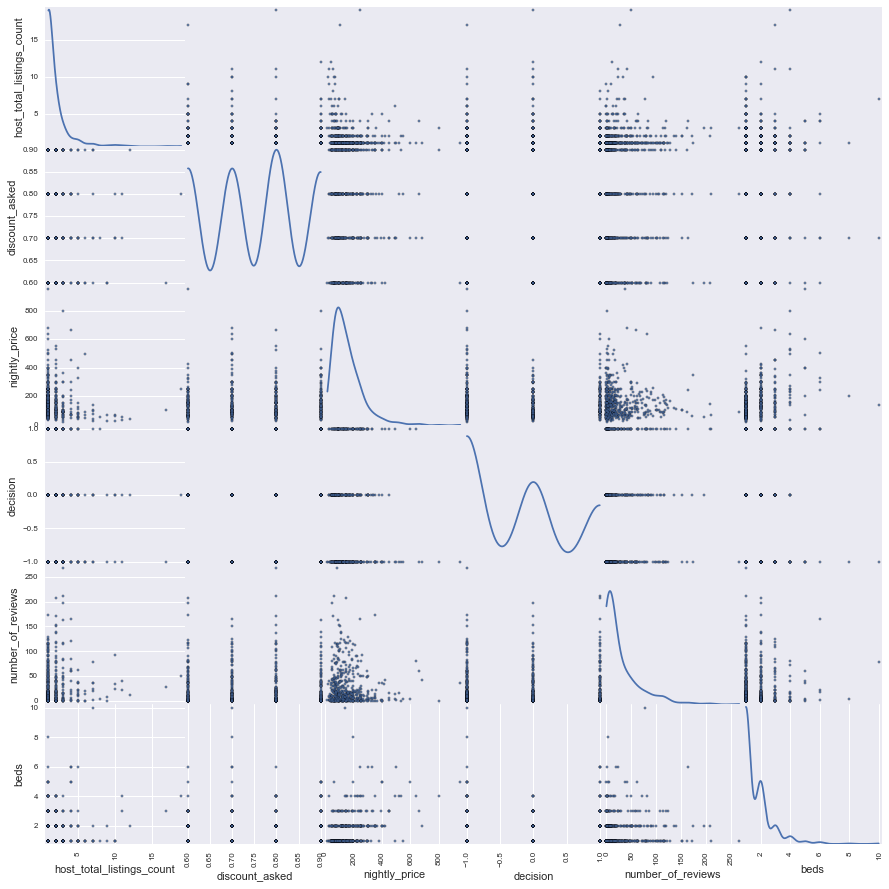

In [9]:
scatter_matrix(round3_scat, diagonal='kde', color='k', alpha=0.8, figsize=(15, 15),)

### Distribution of all/accepting/denying/nonanswering listings with no other filters

Total element in all listings: 514
Percent Listings with No Price Change at All for all listings:  0.29766536965
Total element in accepting listings: 113
Percent Listings with No Price Change at All for accepting listings:  0.256637168142
Total element in denying listings: 157
Percent Listings with No Price Change at All for denying listings:  0.28025477707
Total element in non answering listings: 244
Percent Listings with No Price Change at All for non answering listings:  0.327868852459


C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


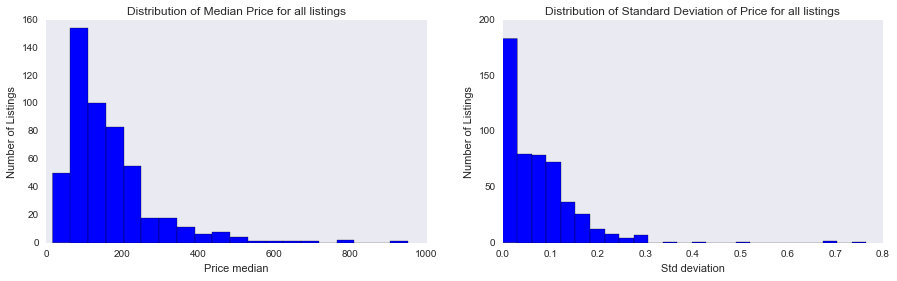

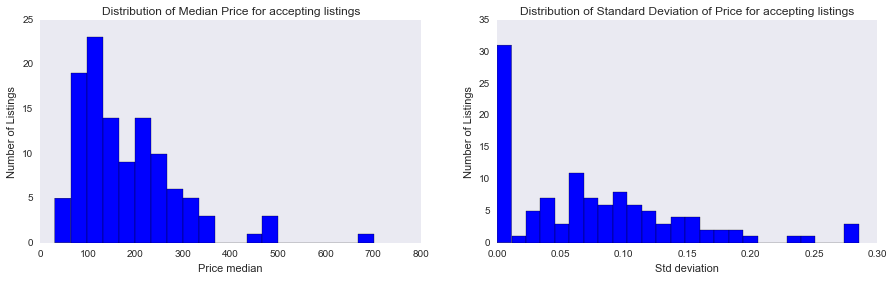

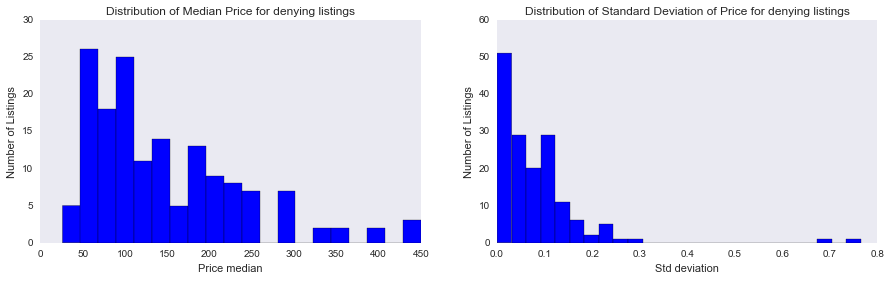

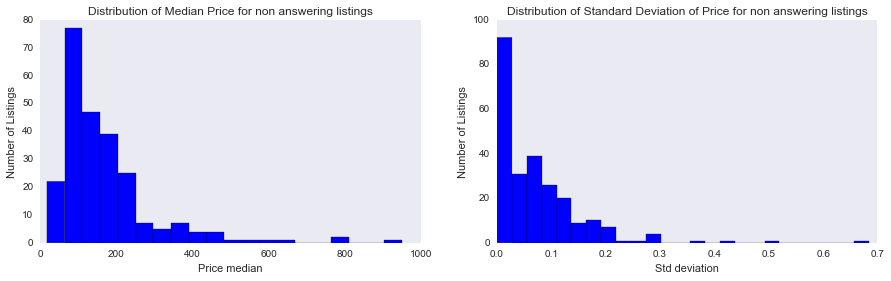

In [10]:
plot_distribution(round3_clean, "all listings")
plot_distribution(round3_accepted, "accepting listings")
plot_distribution(round3_denied, "denying listings")
plot_distribution(round3_not_answer, "non answering listings")

## Distributions and acceptance rate with respect to these parameters:
### - host_is_superhost
### - room_type
### - acceptance rate
### - response rate
### - beds

## (the functions built below are generic and can be used for any others  parameters, categorical or continuous)

#### Auxiliary function for acceptance rate

In [11]:
def number_of(dataframe, field, field_value):
    auxiliar=dataframe.loc[dataframe[field]==field_value]
    return len(auxiliar)


#n accepted, n denied etc. depending on the kind of field

def acceptance_rate(field, types= None):
    if types == None:        
        types= round3_clean[field].unique()
        print types
    round3_accepted_f = {}
    round3_denied_f={}
    round3_all_negative_f={}
    round3_not_answer_f={}

    for el in types:
        round3_accepted_f[el] = number_of (round3_accepted, field, el)
        round3_denied_f[el] = number_of (round3_denied, field, el)
        round3_all_negative_f[el] = number_of (round3_all_negative, field, el)
        round3_not_answer_f[el] = number_of (round3_not_answer, field, el)

    for el in types:
        try:
            print "Category: "+ field+ " "+ " type: "+ str(el)+ " percentage over all replied: " + str(float(round3_accepted_f[el])/(round3_denied_f[el]+ round3_accepted_f[el]))
            print "Category: "+ field+ " "+ " type: "+ str(el)+ " percentage over all contacted: " + str(float(round3_accepted_f[el])/(round3_all_negative_f[el]+ round3_accepted_f[el]))

        except ZeroDivisionError:
            print "division by 0"
    result_dict= {"types": types, "accepted": round3_accepted_f, "denied": round3_denied_f,"not_answer":round3_not_answer_f,
                 "all_negative": round3_all_negative_f, "category": field}         
    return result_dict

            

def acceptance_rate_continuous(field, ranges):

    #types= round3_clean[field].unique()
    #print types
    round3_accepted_f = {}
    round3_denied_f={}
    round3_all_negative_f={}
    round3_not_answer_f={}

    for el in range(len(ranges)-1):
        print el
        
        round3_accepted_f[el] = len(round3_accepted[round3_accepted[field].isin(range(ranges[el],ranges[el+1],1)) ])
        round3_denied_f[el] = len(round3_denied[round3_denied[field].isin(range(ranges[el],ranges[el+1],1)) ])
        round3_all_negative_f[el] = len(round3_all_negative[round3_all_negative[field].isin(range(ranges[el],ranges[el+1],1) ) ])
        round3_not_answer_f[el] = len(round3_not_answer[round3_not_answer[field].isin(range(ranges[el],ranges[el+1],1) )])
        
        

    for el in range(len(ranges)-1):
        current_label= field + " range: [" +str(ranges[el])+","+str(ranges[el+1])+"]"

        try:
            print "Category: "+ field+ " "+ " type: "+ current_label+ " percentage over all replied: " + str(float(round3_accepted_f[el])/(round3_denied_f[el]+ round3_accepted_f[el]))
            print "Category: "+ field+ " "+ " type: "+ current_label+ " percentage over all contacted: " + str(float(round3_accepted_f[el])/(round3_all_negative_f[el]+ round3_accepted_f[el]))

        except ZeroDivisionError:
            print "division by 0"
            
    result_dict= {"ranges": ranges, "accepted": round3_accepted_f, "denied": round3_denied_f,"not_answer":round3_not_answer_f,
                 "all_negative": round3_all_negative_f, "category": field}         
    return result_dict


In [675]:
'''
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
'''        
import math

def plot_percentage (percentage_dictionary, type_input, color= "g" ):
    p_replied= []
    p_all= []
    p_size= []
    p_size_answered= []
    #alphab = ['1 w', '2 w', 'More w']
    x_axis=[]
    p_std= []
    p_std_a= []
    if type_input == "categorical":
        print "categorical"
        for el in percentage_dictionary["types"]:
            try:
                repl=float(percentage_dictionary['accepted'][el])/(percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el])
                p_replied.append(repl)
                al=float(percentage_dictionary['accepted'][el])/(percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el])
                p_all.append(al )
                
                p_size_answered.append(str(percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el]))
                p_size.append(str(percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el]))
                #53(1 - 53/100))1/2
                p_std.append (math.sqrt(al*(1-al)/ (percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el]) ) )
                                                                                    
                p_std_a.append (math.sqrt(al*(1-al)/ (percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el]) )) 
                
                x_axis.append(el)
            except ZeroDivisionError:
                print "division by 0"        
    elif type_input == "continuous":
        for el in range(len(percentage_dictionary['ranges'])-1):
            current_label=  "[" +str(percentage_dictionary['ranges'][el])+","+str(percentage_dictionary['ranges'][el+1])+"]"            
            try:
                p_replied.append(float(percentage_dictionary['accepted'][el])/(percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el]))
                                                                               
                p_all.append(float(percentage_dictionary['accepted'][el])/(float(percentage_dictionary['accepted'][el])+percentage_dictionary['all_negative'][el]))
                p_size_answered.append(str(percentage_dictionary['accepted'][el]+percentage_dictionary['denied'][el]))               
                p_size.append(str(percentage_dictionary['accepted'][el]+percentage_dictionary['all_negative'][el]))
                p_std.append (math.sqrt((1- (float(percentage_dictionary['accepted'][el])/(float(percentage_dictionary['accepted'][el])+percentage_dictionary['denied'][el]) ) )))
                                                                                    
                p_std_a.append (math.sqrt((1- (float(percentage_dictionary['accepted'][el])/(float(percentage_dictionary['accepted'][el])+percentage_dictionary['all_negative'][el]) ) )))
                
                x_axis.append(current_label)
            except ZeroDivisionError:
                print "division by 0"                
    else:
        print "invalid type"
        return

    
    plt.subplot(1,2,1)
    
    pos = np.arange(len(x_axis))
    print np.arange(len(x_axis))
    print "percentage:"
    print p_replied
    print "size"
    print p_size_answered
    print "std deviation:"
    print p_std_a
    print "\n"
    print "percentage:"
    print p_all
    print "size"
    print p_size
    print "std deviation:"    
    print p_std
    print "average over all replied "+ str(np.mean(p_replied))
    print "average over all contacted "+ str(np.mean(p_all))
    
    width = 0.7     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    x_axis2= x_axis
    for idx, val in enumerate(x_axis):
        x_axis[idx]=str(x_axis[idx])+"\n"+str(p_size_answered[idx])
    ax.set_xticklabels(x_axis)
    
    plt.xlabel(percentage_dictionary['category'])
    plt.ylabel('Acceptance rate (%)')
    plt.title('Acceptance among the hosts who replied')
    
    '''
    plt.text(pos + (width / 2), 1.05*pos,
                '%d' % len(),
                ha='center', va='bottom')
    '''
    #, yerr=[int(i)/400 for i in p_size_answered]
    div=float(0.5)
    
    
    plt.bar(pos, p_replied, width, color = color,yerr=[i/div for i in p_std_a])
    
    ####################################quantity
    #rects1 = ax.bar(pos, p_replied, width, color = color)
    #autolabel(rects1)
    
    plt.show()

    
    plt.subplot(1,2,2)

    
    pos = np.arange(len(x_axis))
    width = 0.7     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    
    for idx, val in enumerate(x_axis):
        x_axis2[idx]= str(x_axis2[idx])+"\n"+str(p_size[idx])
    ax.set_xticklabels(x_axis2)
    
    plt.xlabel(percentage_dictionary['category'])
    plt.ylabel('Acceptance rate (%)')
    plt.title('Acceptance among all the hosts')

    #,yerr=[int(i)/491 for i in p_size]
    plt.bar(pos, p_all, width, color= color,yerr=[ i/div for i in p_std] )
    plt.show()
   

In [629]:
round3['room_type'].unique()

array([u'Private room', u'Entire home/apt', u'Shared room'], dtype=object)

Total element in super hosts: 23
Percent Listings with No Price Change at All for super hosts:  0.347826086957
Total element in non super hosts: 491
Percent Listings with No Price Change at All for non super hosts:  0.295315682281


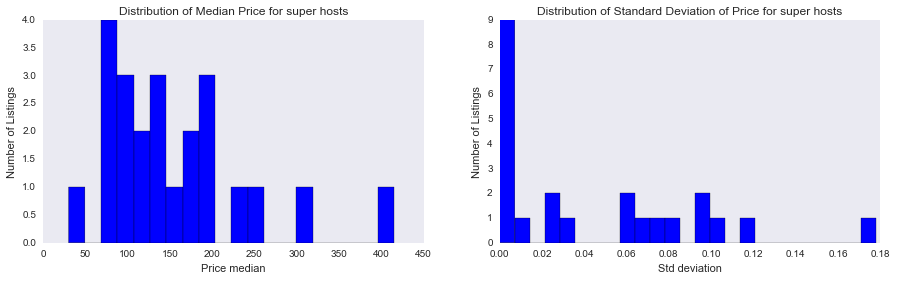

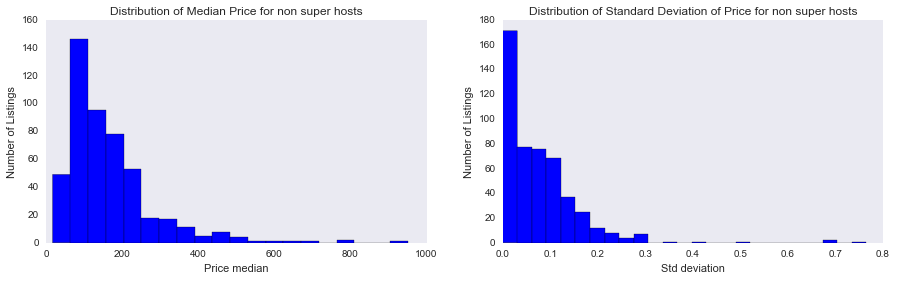

In [630]:
#Superhost
plot_distribution(round3_clean[round3_clean["host_is_superhost"]==1], "super hosts")
plot_distribution(round3_clean[round3_clean["host_is_superhost"]==0], "non super hosts")

In [631]:
acc_superhost= acceptance_rate("host_is_superhost")

[0 1]
Category: host_is_superhost  type: 0 percentage over all replied: 0.415019762846
Category: host_is_superhost  type: 0 percentage over all contacted: 0.213849287169
Category: host_is_superhost  type: 1 percentage over all replied: 0.470588235294
Category: host_is_superhost  type: 1 percentage over all contacted: 0.347826086957


categorical
[0 1]
percentage:
[0.4150197628458498, 0.47058823529411764]
size
['253', '17']
std deviation:
[0.01850401891428767, 0.09931134621220186]


percentage:
[0.21384928716904278, 0.34782608695652173]
size
['491', '23']
std deviation:
[0.01850401891428767, 0.09931134621220186]
average over all replied 0.44280399907
average over all contacted 0.280837687063


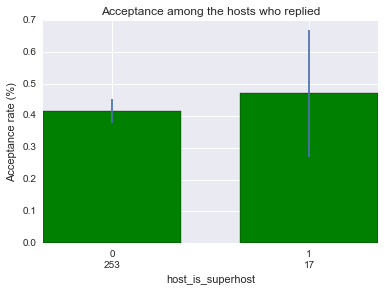

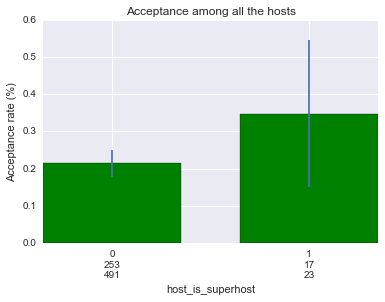

In [676]:
plot_percentage(acc_superhost, "categorical")

Total element in entire room: 309
Percent Listings with No Price Change at All for entire room:  0.278317152104
Total element in private room: 196
Percent Listings with No Price Change at All for private room:  0.326530612245
Total element in shared room: 9
Percent Listings with No Price Change at All for shared room:  0.333333333333


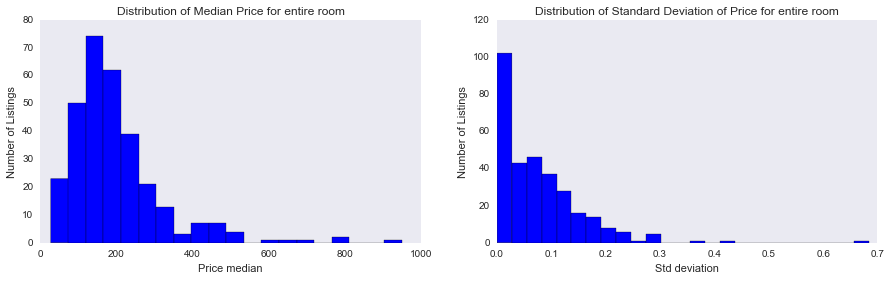

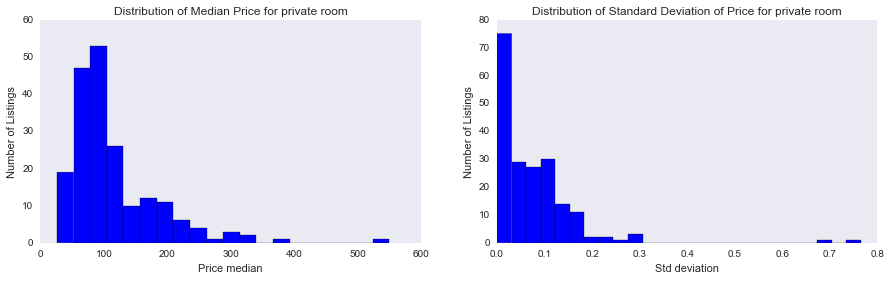

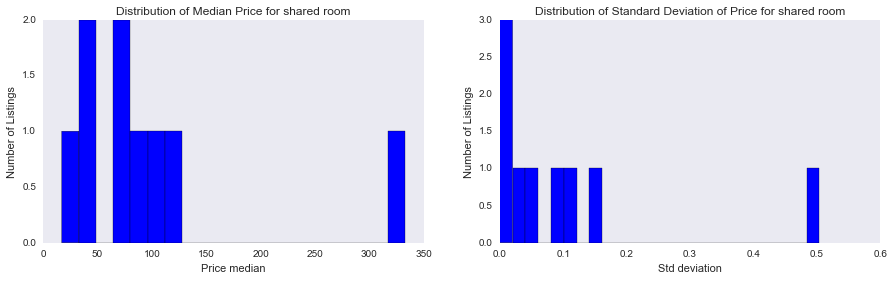

In [633]:
#Room type
plot_distribution(round3_clean[round3_clean["room_type"]==0], "entire room")
plot_distribution(round3_clean[round3_clean["room_type"]==1], "private room")
plot_distribution(round3_clean[round3_clean["room_type"]==2], "shared room")


In [634]:
acc_room_type= acceptance_rate("room_type")

[1 0 2]
Category: room_type  type: 1 percentage over all replied: 0.394230769231
Category: room_type  type: 1 percentage over all contacted: 0.209183673469
Category: room_type  type: 0 percentage over all replied: 0.439024390244
Category: room_type  type: 0 percentage over all contacted: 0.233009708738
Category: room_type  type: 2 percentage over all replied: 0.0
Category: room_type  type: 2 percentage over all contacted: 0.0


In [635]:




#len(round3_clean[round3_clean['host_acceptance_rate'].isin([189,200])])


categorical
[0 1 2]
percentage:
[0.3942307692307692, 0.43902439024390244, 0.0]
size
['104', '164', '2']
std deviation:
[0.029051841789171695, 0.024049314516451332, 0.0]


percentage:
[0.20918367346938777, 0.23300970873786409, 0.0]
size
['196', '309', '9']
std deviation:
[0.029051841789171695, 0.024049314516451332, 0.0]
average over all replied 0.277751719825
average over all contacted 0.147397794069


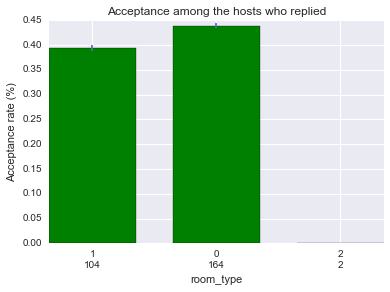

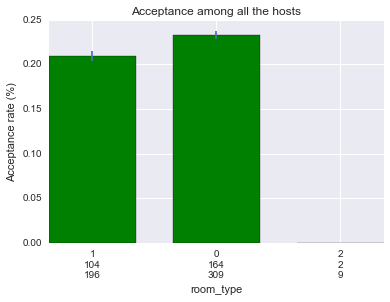

In [636]:
plot_percentage(acc_room_type, "categorical")

Total element in host acceptance rate range: [0,25]: 18
Percent Listings with No Price Change at All for host acceptance rate range: [0,25]:  0.222222222222
Total element in host acceptance rate range: [25,50]: 20
Percent Listings with No Price Change at All for host acceptance rate range: [25,50]:  0.55
Total element in host acceptance rate range: [50,75]: 27
Percent Listings with No Price Change at All for host acceptance rate range: [50,75]:  0.444444444444
Total element in host acceptance rate range: [75,100]: 254
Percent Listings with No Price Change at All for host acceptance rate range: [75,100]:  0.318897637795


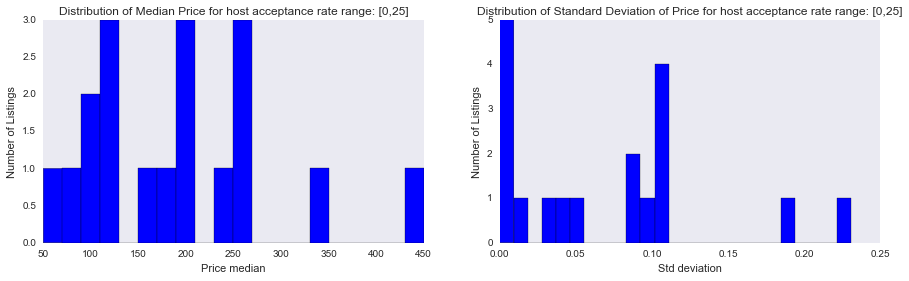

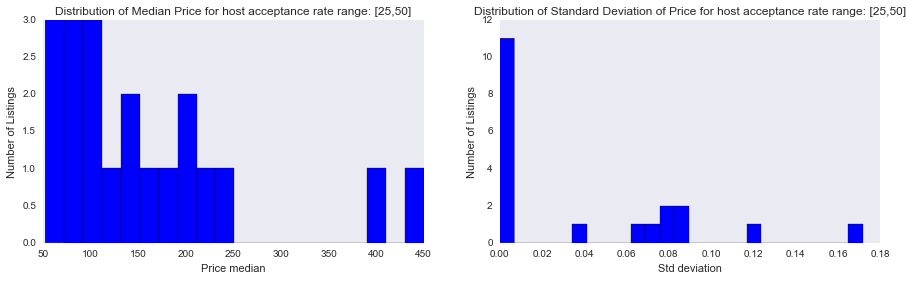

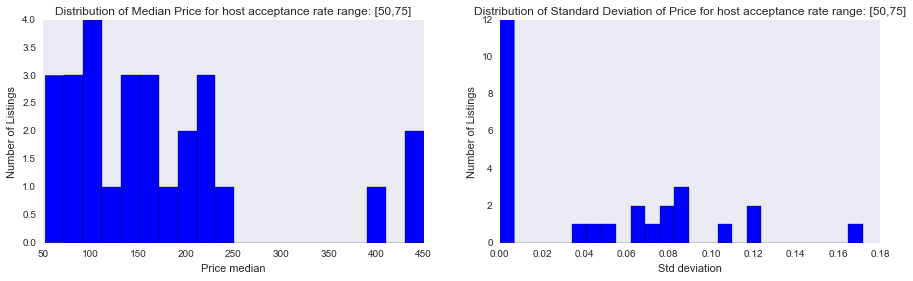

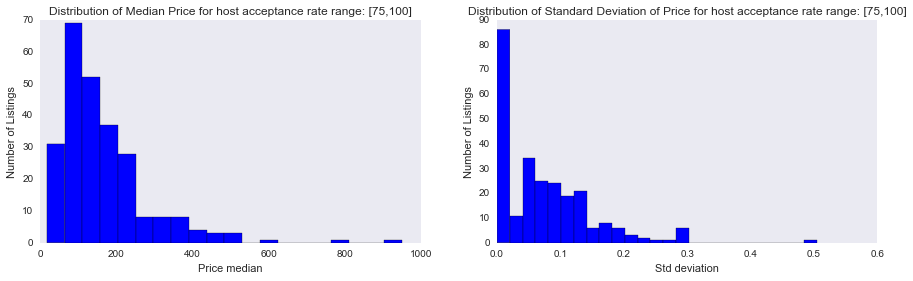

In [637]:
plot_interval(round3_clean,'host_acceptance_rate', range(0,101,25),"host acceptance rate"  )

In [638]:
acc_acceptance_rate= acceptance_rate_continuous('host_acceptance_rate', range(0,101,15))


0
1
2
3
4
5
Category: host_acceptance_rate  type: host_acceptance_rate range: [0,15] percentage over all replied: 0.6
Category: host_acceptance_rate  type: host_acceptance_rate range: [0,15] percentage over all contacted: 0.333333333333
Category: host_acceptance_rate  type: host_acceptance_rate range: [15,30] percentage over all replied: 0.333333333333
Category: host_acceptance_rate  type: host_acceptance_rate range: [15,30] percentage over all contacted: 0.2
Category: host_acceptance_rate  type: host_acceptance_rate range: [30,45] percentage over all replied: 0.8
Category: host_acceptance_rate  type: host_acceptance_rate range: [30,45] percentage over all contacted: 0.5
Category: host_acceptance_rate  type: host_acceptance_rate range: [45,60] percentage over all replied: 0.2
Category: host_acceptance_rate  type: host_acceptance_rate range: [45,60] percentage over all contacted: 0.0909090909091
Category: host_acceptance_rate  type: host_acceptance_rate range: [60,75] percentage over al

[0 1 2 3 4 5]
percentage:
[0.6, 0.3333333333333333, 0.8, 0.2, 0.5625, 0.39473684210526316]
size
['10', '3', '5', '10', '16', '38']
std deviation:
[0.816496580927726, 0.8944271909999159, 0.7071067811865476, 0.9534625892455924, 0.8477912478906585, 0.8897565210026093]


percentage:
[0.3333333333333333, 0.2, 0.5, 0.09090909090909091, 0.28125, 0.20833333333333334]
size
['18', '5', '8', '22', '32', '72']
std deviation:
[0.6324555320336759, 0.816496580927726, 0.44721359549995787, 0.8944271909999159, 0.6614378277661477, 0.7779866052154991]
average over all replied 0.481761695906
average over all contacted 0.268970959596


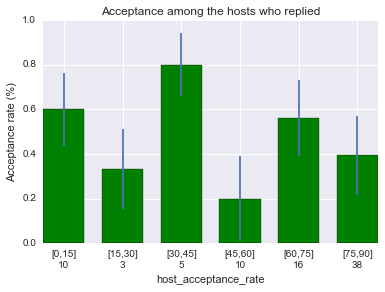

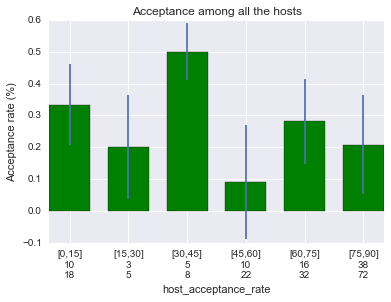

In [639]:
plot_percentage(acc_acceptance_rate, "continuous")

In [640]:
acc_nightly= acceptance_rate_continuous('nightly_price', range(0,700,20))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
division by 0
Category: nightly_price  type: nightly_price range: [20,40] percentage over all replied: 0.333333333333
Category: nightly_price  type: nightly_price range: [20,40] percentage over all contacted: 0.2
Category: nightly_price  type: nightly_price range: [40,60] percentage over all replied: 0.2
Category: nightly_price  type: nightly_price range: [40,60] percentage over all contacted: 0.128205128205
Category: nightly_price  type: nightly_price range: [60,80] percentage over all replied: 0.275862068966
Category: nightly_price  type: nightly_price range: [60,80] percentage over all contacted: 0.145454545455
Category: nightly_price  type: nightly_price range: [80,100] percentage over all replied: 0.454545454545
Category: nightly_price  type: nightly_price range: [80,100] percentage over all contacted: 0.245901639344
Category: nightly_price  type: nightly_price range: [100,120] percentage o

division by 0
division by 0
division by 0
division by 0
division by 0
division by 0
division by 0
division by 0
division by 0
division by 0
division by 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
percentage:
[0.3333333333333333, 0.2, 0.27586206896551724, 0.45454545454545453, 0.32, 0.6875, 0.44, 0.26666666666666666, 0.5, 0.6666666666666666, 0.3333333333333333, 0.5, 1.0, 0.4, 0.3333333333333333, 0.6666666666666666, 0.0, 0.0, 0.0, 1.0, 0.5, 1.0, 1.0]
size
['6', '25', '29', '33', '25', '16', '25', '15', '8', '12', '12', '14', '3', '5', '6', '3', '2', '1', '1', '1', '2', '1', '1']
std deviation:
[0.8944271909999159, 0.9336995618478525, 0.9244162777371754, 0.8683883697146904, 0.9021937088963173, 0.8626621856275073, 0.8779711460710616, 0.9258200997725515, 0.9088932591463857, 0.816496580927726, 0.8819171036881969, 0.848528137423857, 0.6324555320336759, 0.816496580927726, 0.816496580927726, 0.7071067811865476, 1.0, 1.0, 1.0, 0.8660254037844386, 0.816496580927726, 0.

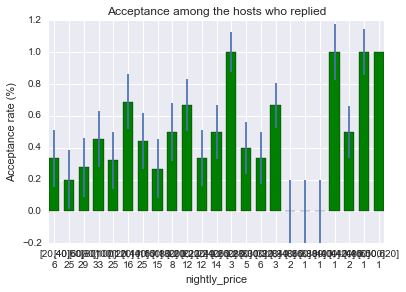

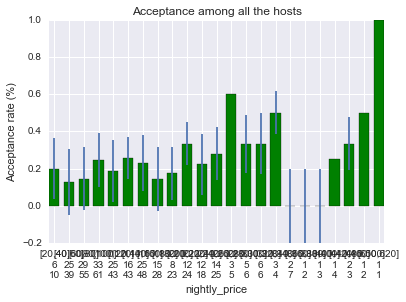

In [641]:
plot_percentage(acc_nightly, "continuous")

Total element in host response rate range: [0,25]: 2
Percent Listings with No Price Change at All for host response rate range: [0,25]:  0.0
Total element in host response rate range: [25,50]: 6
Percent Listings with No Price Change at All for host response rate range: [25,50]:  0.333333333333
Total element in host response rate range: [50,75]: 11
Percent Listings with No Price Change at All for host response rate range: [50,75]:  0.454545454545
Total element in host response rate range: [75,100]: 263
Percent Listings with No Price Change at All for host response rate range: [75,100]:  0.32319391635


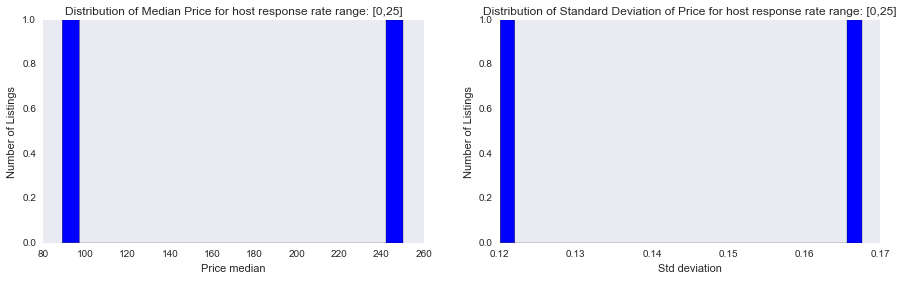

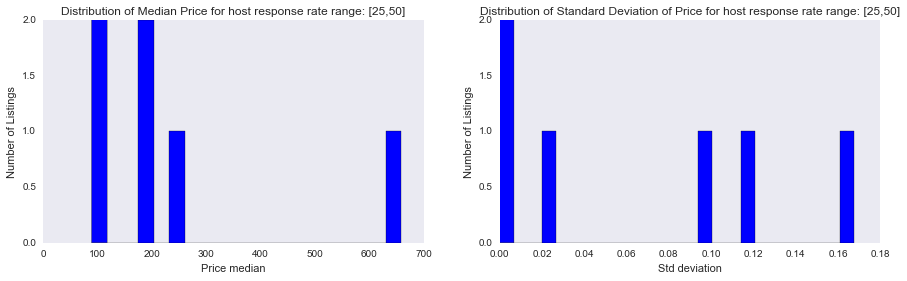

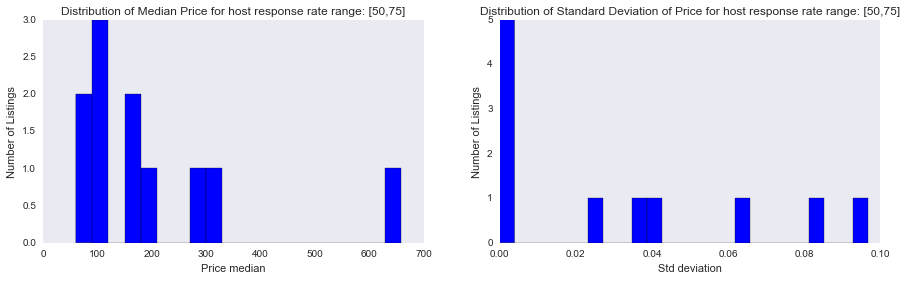

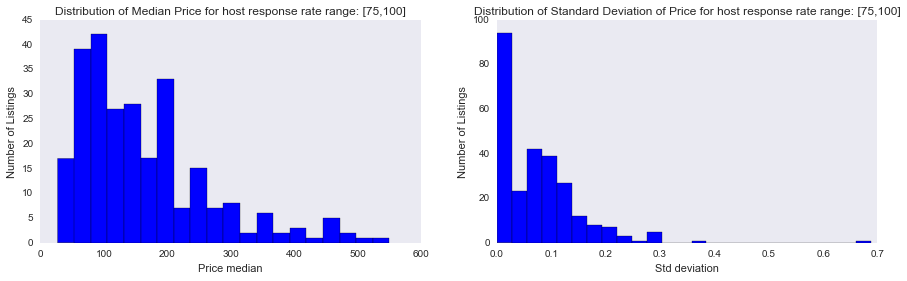

In [642]:
plot_interval(round3_clean,'host_response_rate', range(0,101,25),"host response rate"  )

In [643]:
acc_response_rate= acceptance_rate_continuous('host_response_rate', range(75,101,2))


0
1
2
3
4
5
6
7
8
9
10
11
Category: host_response_rate  type: host_response_rate range: [75,77] percentage over all replied: 0.0
Category: host_response_rate  type: host_response_rate range: [75,77] percentage over all contacted: 0.0
Category: host_response_rate  type: host_response_rate range: [77,79] percentage over all replied: 1.0
Category: host_response_rate  type: host_response_rate range: [77,79] percentage over all contacted: 1.0
Category: host_response_rate  type: host_response_rate range: [79,81] percentage over all replied: 0.52380952381
Category: host_response_rate  type: host_response_rate range: [79,81] percentage over all contacted: 0.34375
Category: host_response_rate  type: host_response_rate range: [81,83] percentage over all replied: 0.5
Category: host_response_rate  type: host_response_rate range: [81,83] percentage over all contacted: 0.25
Category: host_response_rate  type: host_response_rate range: [83,85] percentage over all replied: 0.5
Category: host_response_

[ 0  1  2  3  4  5  6  7  8  9 10 11]
percentage:
[0.0, 1.0, 0.5238095238095238, 0.5, 0.5, 0.375, 0.0, 0.48, 0.3333333333333333, 0.2222222222222222, 0.5, 0.2]
size
['3', '2', '21', '2', '6', '8', '3', '25', '3', '9', '14', '5']
std deviation:
[1.0, 0.0, 0.8100925873009825, 0.8660254037844386, 0.8660254037844386, 0.8366600265340756, 1.0, 0.8795367562872954, 0.8660254037844386, 0.9459053029269173, 0.8416254115301731, 0.9354143466934853]


percentage:
[0.0, 1.0, 0.34375, 0.25, 0.25, 0.3, 0.0, 0.22641509433962265, 0.25, 0.10526315789473684, 0.2916666666666667, 0.125]
size
['9', '2', '32', '4', '12', '10', '8', '53', '4', '19', '24', '8']
std deviation:
[1.0, 0.0, 0.6900655593423543, 0.7071067811865476, 0.7071067811865476, 0.7905694150420949, 1.0, 0.7211102550927979, 0.816496580927726, 0.8819171036881969, 0.7071067811865476, 0.8944271909999159]
average over all replied 0.386197089947
average over all contacted 0.261841243242


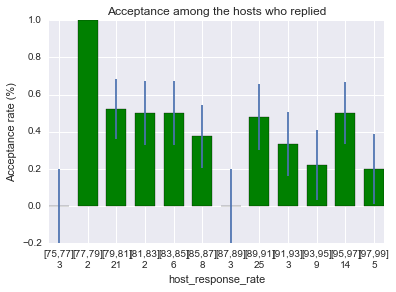

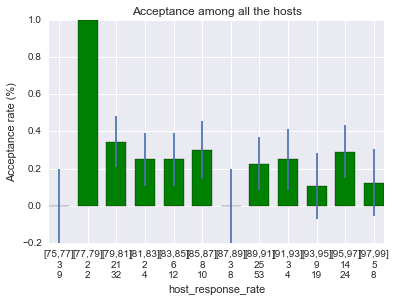

In [644]:
plot_percentage(acc_response_rate, "continuous")

In [645]:
acc_review= acceptance_rate_continuous('number_of_reviews', range(0,200,25))

0
1
2
3
4
5
6
Category: number_of_reviews  type: number_of_reviews range: [0,25] percentage over all replied: 0.39880952381
Category: number_of_reviews  type: number_of_reviews range: [0,25] percentage over all contacted: 0.199404761905
Category: number_of_reviews  type: number_of_reviews range: [25,50] percentage over all replied: 0.46511627907
Category: number_of_reviews  type: number_of_reviews range: [25,50] percentage over all contacted: 0.25974025974
Category: number_of_reviews  type: number_of_reviews range: [50,75] percentage over all replied: 0.285714285714
Category: number_of_reviews  type: number_of_reviews range: [50,75] percentage over all contacted: 0.15
Category: number_of_reviews  type: number_of_reviews range: [75,100] percentage over all replied: 0.5
Category: number_of_reviews  type: number_of_reviews range: [75,100] percentage over all contacted: 0.346153846154
Category: number_of_reviews  type: number_of_reviews range: [100,125] percentage over all replied: 0.54545

In [646]:
print range(0,200,25)

[0, 25, 50, 75, 100, 125, 150, 175]


[0 1 2 3 4 5 6]
percentage:
[0.39880952380952384, 0.46511627906976744, 0.2857142857142857, 0.5, 0.5454545454545454, 0.6666666666666666, 0.3333333333333333]
size
['168', '43', '21', '18', '11', '3', '3']
std deviation:
[0.8947598773387406, 0.8603834844182798, 0.9219544457292888, 0.8086075400626399, 0.8528028654224418, 0.5773502691896258, 0.9128709291752769]


percentage:
[0.19940476190476192, 0.2597402597402597, 0.15, 0.34615384615384615, 0.2727272727272727, 0.6666666666666666, 0.16666666666666666]
size
['336', '77', '40', '26', '22', '3', '6']
std deviation:
[0.7753647375206563, 0.7313574508612274, 0.8451542547285166, 0.7071067811865476, 0.6741998624632421, 0.5773502691896258, 0.816496580927726]
average over all replied 0.456442090578
average over all contacted 0.294479924837


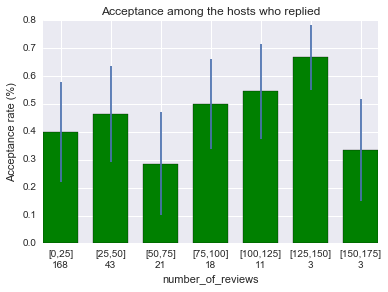

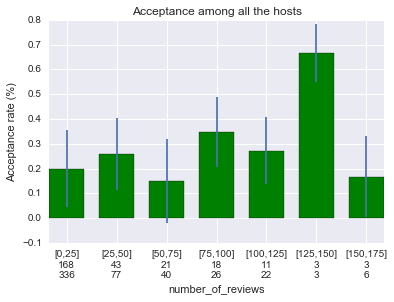

In [647]:
plot_percentage(acc_review, "continuous")

In [648]:
acc_review= acceptance_rate_continuous('number_of_reviews', range(0,6,1))

0
1
2
3
4
Category: number_of_reviews  type: number_of_reviews range: [0,1] percentage over all replied: 0.260869565217
Category: number_of_reviews  type: number_of_reviews range: [0,1] percentage over all contacted: 0.127659574468
Category: number_of_reviews  type: number_of_reviews range: [1,2] percentage over all replied: 0.409090909091
Category: number_of_reviews  type: number_of_reviews range: [1,2] percentage over all contacted: 0.230769230769
Category: number_of_reviews  type: number_of_reviews range: [2,3] percentage over all replied: 0.4
Category: number_of_reviews  type: number_of_reviews range: [2,3] percentage over all contacted: 0.181818181818
Category: number_of_reviews  type: number_of_reviews range: [3,4] percentage over all replied: 0.384615384615
Category: number_of_reviews  type: number_of_reviews range: [3,4] percentage over all contacted: 0.227272727273
Category: number_of_reviews  type: number_of_reviews range: [4,5] percentage over all replied: 0.666666666667
Cat

[0 1 2 3 4]
percentage:
[0.2608695652173913, 0.4090909090909091, 0.4, 0.38461538461538464, 0.6666666666666666]
size
['23', '22', '10', '13', '9']
std deviation:
[0.933991662453105, 0.8770580193070292, 0.9045340337332909, 0.8790490729915326, 0.8271701918685112]


percentage:
[0.1276595744680851, 0.23076923076923078, 0.18181818181818182, 0.22727272727272727, 0.3157894736842105]
size
['47', '39', '22', '22', '19']
std deviation:
[0.8597269536210951, 0.7687061147858073, 0.7745966692414834, 0.7844645405527362, 0.5773502691896258]
average over all replied 0.424248505118
average over all contacted 0.216661837602


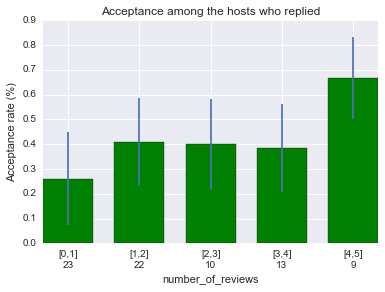

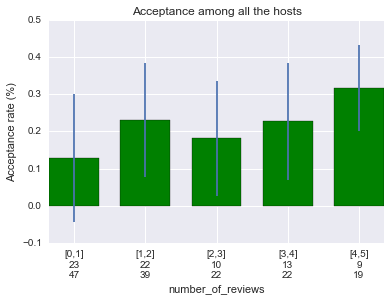

In [649]:
plot_percentage(acc_review, "continuous")

Total element in beds  range: [0,1]: 305
Percent Listings with No Price Change at All for beds  range: [0,1]:  0.311475409836
Total element in beds  range: [1,2]: 444
Percent Listings with No Price Change at All for beds  range: [1,2]:  0.304054054054
Total element in beds  range: [2,3]: 180
Percent Listings with No Price Change at All for beds  range: [2,3]:  0.266666666667
Total element in beds  range: [3,4]: 58
Percent Listings with No Price Change at All for beds  range: [3,4]:  0.206896551724
Total element in beds  range: [4,5]: 23
Percent Listings with No Price Change at All for beds  range: [4,5]:  0.304347826087
Total element in beds  range: [5,6]: 10
Percent Listings with No Price Change at All for beds  range: [5,6]:  0.5
Total element in beds  range: [6,7]: 4
Percent Listings with No Price Change at All for beds  range: [6,7]:  0.5
Total element in beds  range: [7,8]: 1
Percent Listings with No Price Change at All for beds  range: [7,8]:  0.0
Total element in beds  range: [8

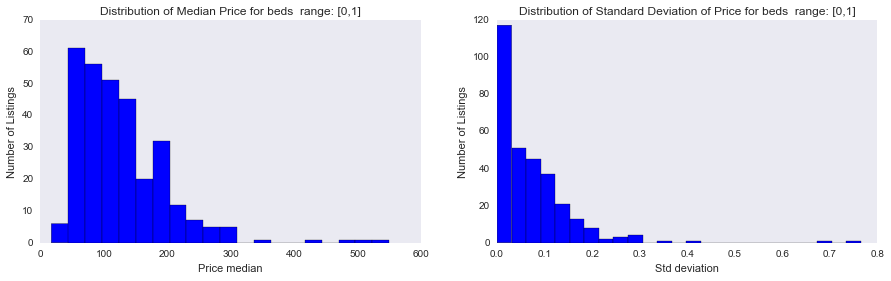

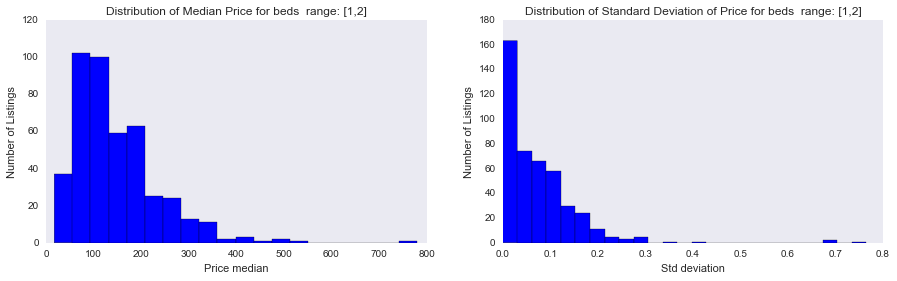

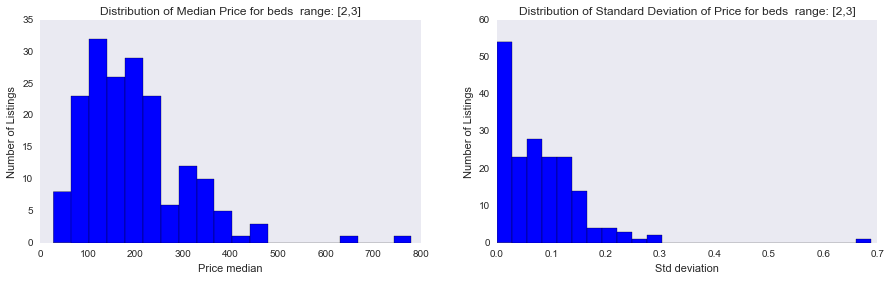

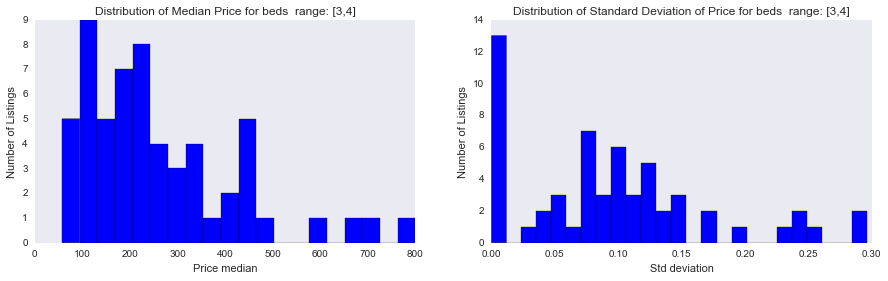

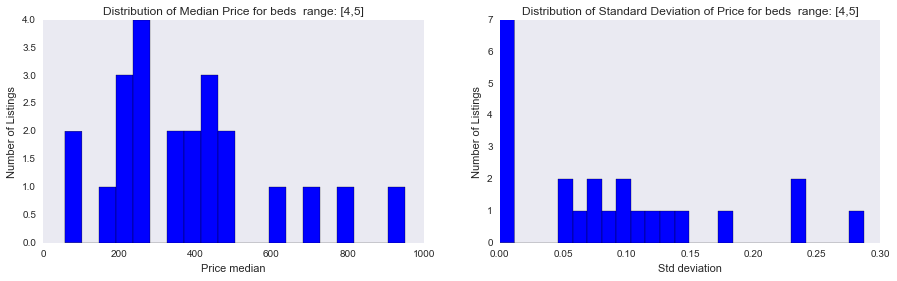

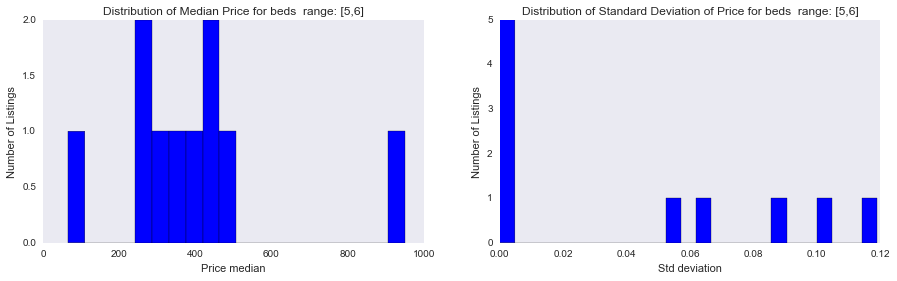

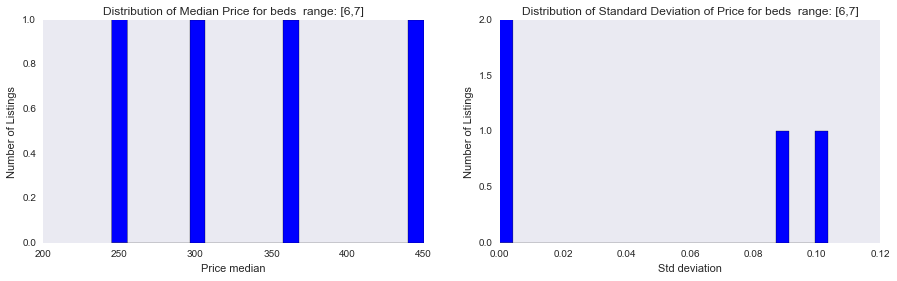

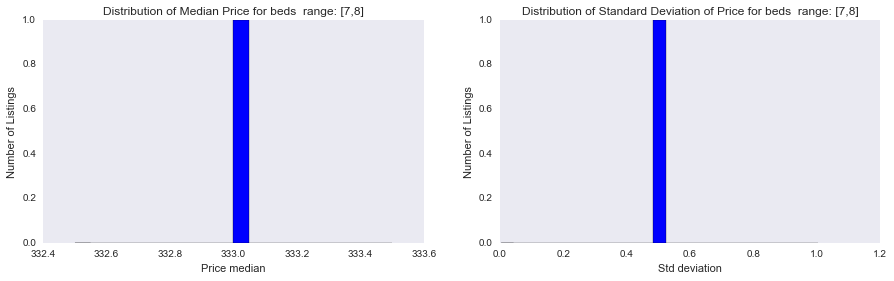

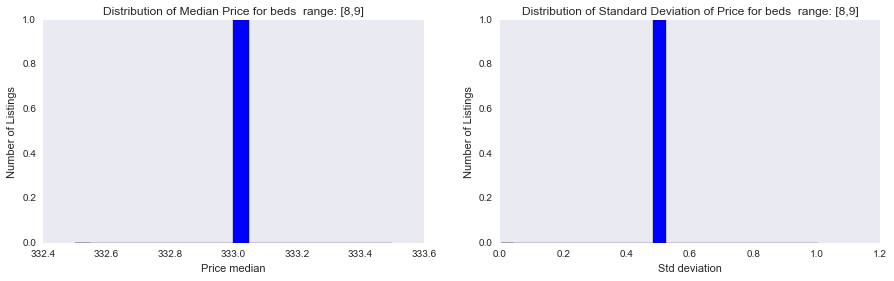

In [650]:
plot_interval(round3_clean,'beds', range(0,10,1),"beds "  )

In [651]:
acc_beds= acceptance_rate("beds")

[ 1  4  2  3  8 10  5  6]
Category: beds  type: 1 percentage over all replied: 0.388535031847
Category: beds  type: 1 percentage over all contacted: 0.2
Category: beds  type: 4 percentage over all replied: 0.555555555556
Category: beds  type: 4 percentage over all contacted: 0.294117647059
Category: beds  type: 2 percentage over all replied: 0.424657534247
Category: beds  type: 2 percentage over all contacted: 0.223021582734
Category: beds  type: 3 percentage over all replied: 0.423076923077
Category: beds  type: 3 percentage over all contacted: 0.268292682927
division by 0
division by 0
Category: beds  type: 5 percentage over all replied: 1.0
Category: beds  type: 5 percentage over all contacted: 0.333333333333
Category: beds  type: 6 percentage over all replied: 1.0
Category: beds  type: 6 percentage over all contacted: 0.75


categorical
division by 0
division by 0
[0 1 2 3 4 5]
percentage:
[0.3885350318471338, 0.5555555555555556, 0.4246575342465753, 0.4230769230769231, 1.0, 1.0]
size
['157', '9', '73', '26', '2', '3']
std deviation:
[0.02290393337255473, 0.11051016901502637, 0.0353077891388808, 0.06919603104625983, 0.19245008972987526, 0.21650635094610965]


percentage:
[0.2, 0.29411764705882354, 0.22302158273381295, 0.2682926829268293, 0.3333333333333333, 0.75]
size
['305', '17', '139', '41', '6', '4']
std deviation:
[0.02290393337255473, 0.11051016901502637, 0.0353077891388808, 0.06919603104625983, 0.19245008972987526, 0.21650635094610965]
average over all replied 0.631970840788
average over all contacted 0.344794207675


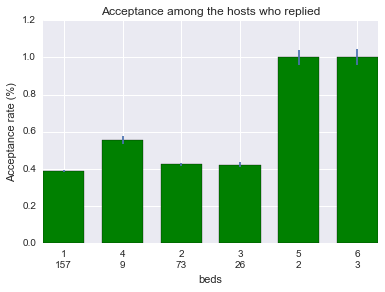

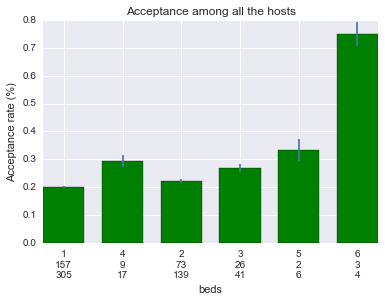

In [652]:
plot_percentage(acc_beds, "categorical")

Total element in listings  range: [0,1]: 323
Percent Listings with No Price Change at All for listings  range: [0,1]:  0.303405572755
Total element in listings  range: [1,2]: 426
Percent Listings with No Price Change at All for listings  range: [1,2]:  0.295774647887
Total element in listings  range: [2,3]: 142
Percent Listings with No Price Change at All for listings  range: [2,3]:  0.281690140845
Total element in listings  range: [3,4]: 53
Percent Listings with No Price Change at All for listings  range: [3,4]:  0.377358490566
Total element in listings  range: [4,5]: 28
Percent Listings with No Price Change at All for listings  range: [4,5]:  0.321428571429
Total element in listings  range: [5,6]: 18
Percent Listings with No Price Change at All for listings  range: [5,6]:  0.111111111111
Total element in listings  range: [6,7]: 10
Percent Listings with No Price Change at All for listings  range: [6,7]:  0.4
Total element in listings  range: [7,8]: 7
Percent Listings with No Price Cha

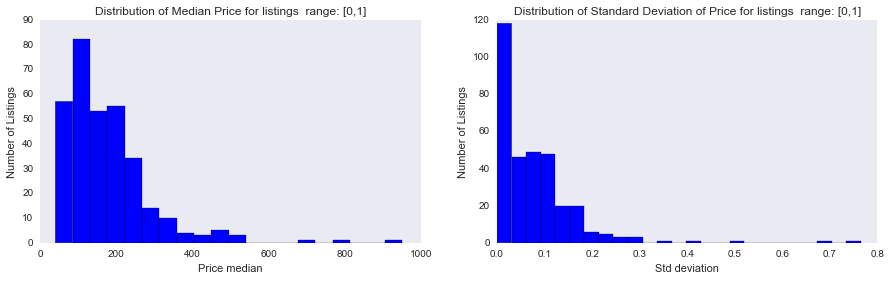

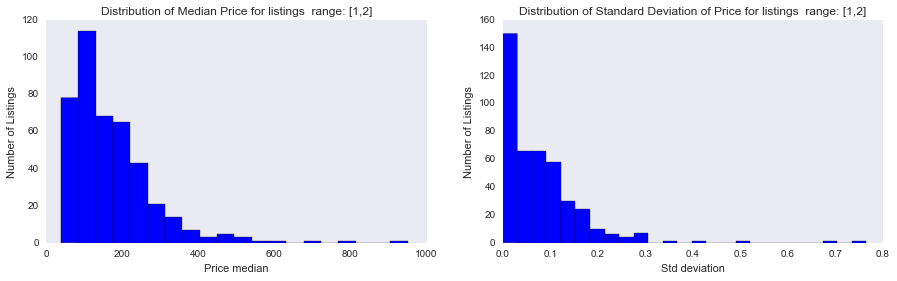

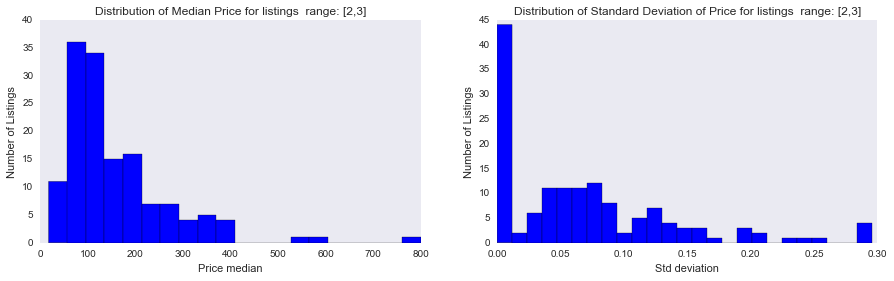

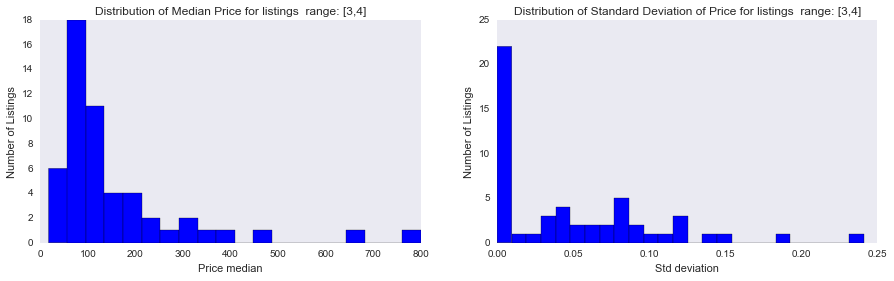

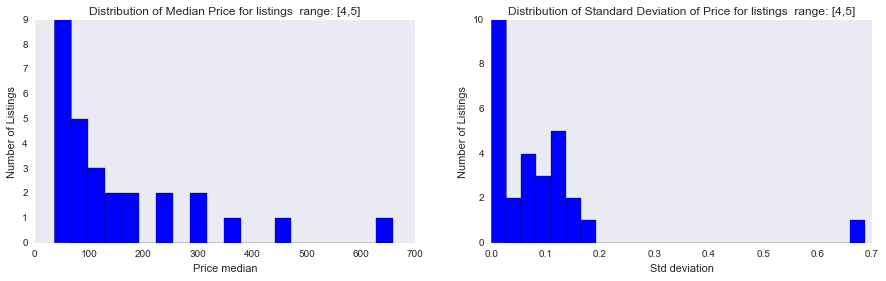

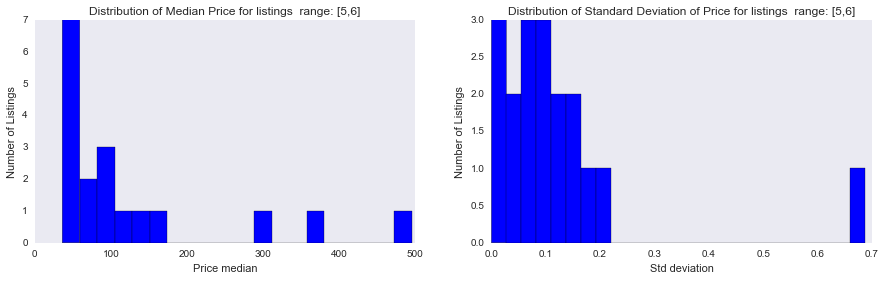

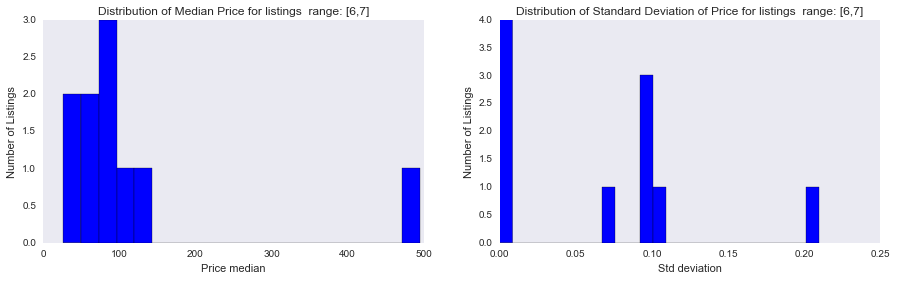

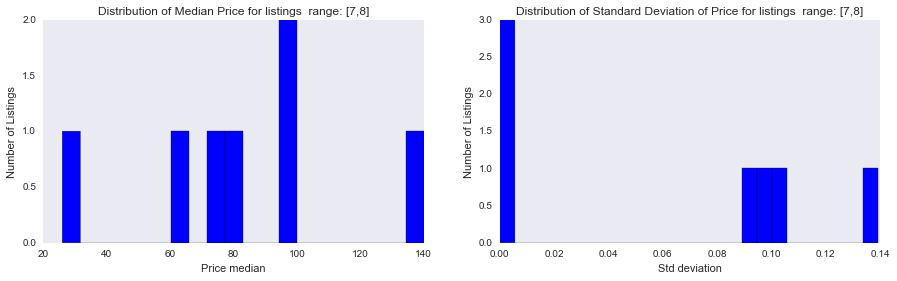

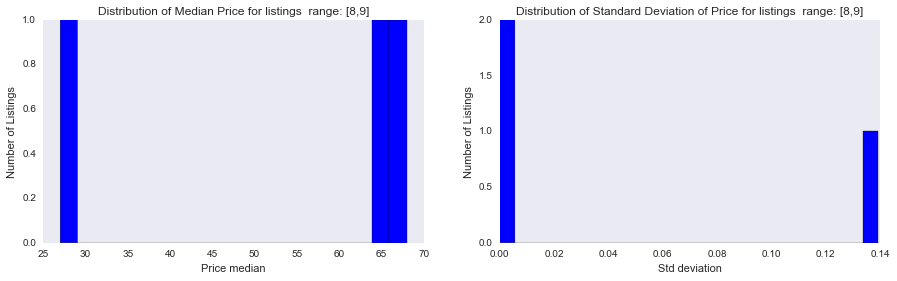

In [653]:
plot_interval(round3_clean,'host_total_listings_count', range(0,10,1),"listings "  )

In [654]:
acc_total_listings= acceptance_rate("host_total_listings_count")

[ 2  1  4  3 10 19  7  8 17 11  6  5  9 12]
Category: host_total_listings_count  type: 2 percentage over all replied: 0.410714285714
Category: host_total_listings_count  type: 2 percentage over all contacted: 0.223300970874
Category: host_total_listings_count  type: 1 percentage over all replied: 0.428571428571
Category: host_total_listings_count  type: 1 percentage over all contacted: 0.213622291022
Category: host_total_listings_count  type: 4 percentage over all replied: 0.5
Category: host_total_listings_count  type: 4 percentage over all contacted: 0.357142857143
Category: host_total_listings_count  type: 3 percentage over all replied: 0.5
Category: host_total_listings_count  type: 3 percentage over all contacted: 0.282051282051
Category: host_total_listings_count  type: 10 percentage over all replied: 0.0
Category: host_total_listings_count  type: 10 percentage over all contacted: 0.0
Category: host_total_listings_count  type: 19 percentage over all replied: 0.0
Category: host_tota

categorical
division by 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
percentage:
[0.4107142857142857, 0.42857142857142855, 0.5, 0.5, 0.0, 0.0, 0.25, 1.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0]
size
['56', '161', '10', '22', '2', '1', '4', '1', '1', '1', '9', '1', '1']
std deviation:
[0.041034871185490686, 0.022805396121555636, 0.12806020814297073, 0.07205737677223015, 0.0, 0.0, 0.15214515486254615, 0.0, 0.0, 0.0, 0.10966421051124835, 0.0, 0.0]


percentage:
[0.22330097087378642, 0.21362229102167182, 0.35714285714285715, 0.28205128205128205, 0.0, 0.0, 0.16666666666666666, 1.0, 0.0, 0.0, 0.21428571428571427, 0.0, 0.0]
size
['103', '323', '14', '39', '3', '1', '6', '1', '2', '4', '14', '2', '1']
std deviation:
[0.041034871185490686, 0.022805396121555636, 0.12806020814297073, 0.07205737677223015, 0.0, 0.0, 0.15214515486254615, 0.0, 0.0, 0.0, 0.10966421051124835, 0.0, 0.0]
average over all replied 0.263278388278
average over all contacted 0.189005367849


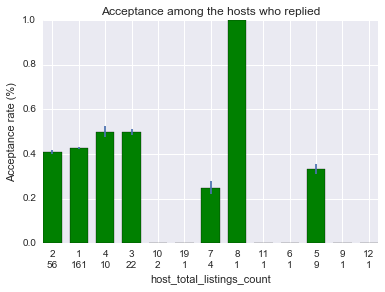

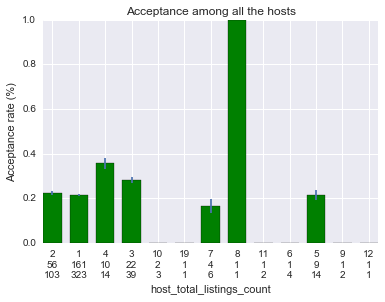

In [655]:
plot_percentage(acc_total_listings, "categorical")

Total element in instant bookable: 77
Percent Listings with No Price Change at All for instant bookable:  0.220779220779
Total element in non instant bookable: 437
Percent Listings with No Price Change at All for non instant bookable:  0.311212814645


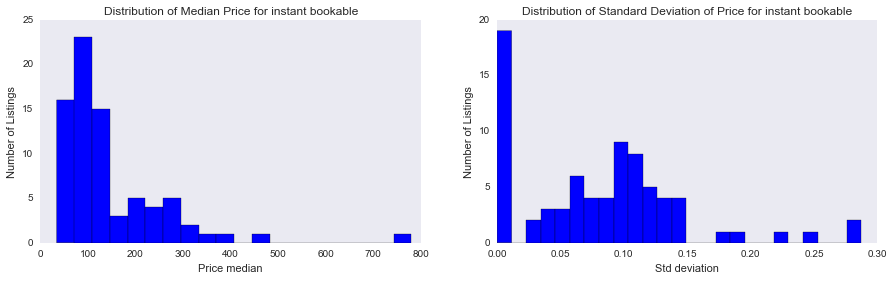

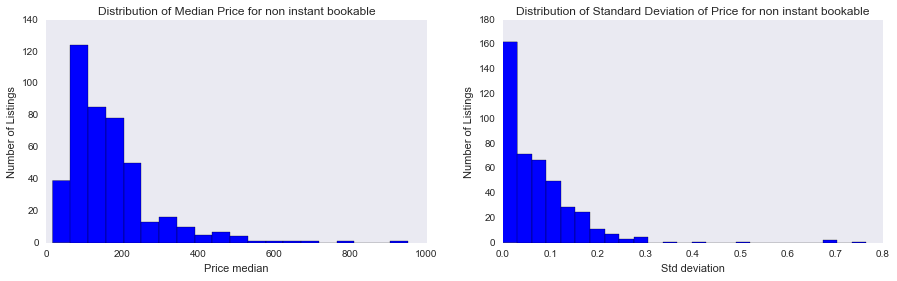

In [656]:
plot_distribution(round3_clean[round3_clean["instant_bookable"]=="t"], "instant bookable")
plot_distribution(round3_clean[round3_clean["instant_bookable"]=="f"], "non instant bookable")

In [657]:
acc_instant= acceptance_rate("instant_bookable")


[u't' u'f']
Category: instant_bookable  type: t percentage over all replied: 0.407407407407
Category: instant_bookable  type: t percentage over all contacted: 0.285714285714
Category: instant_bookable  type: f percentage over all replied: 0.421296296296
Category: instant_bookable  type: f percentage over all contacted: 0.20823798627


categorical
[0 1]
percentage:
[0.4074074074074074, 0.4212962962962963]
size
['54', '216']
std deviation:
[0.051482140725460514, 0.01942390700294625]


percentage:
[0.2857142857142857, 0.20823798627002288]
size
['77', '437']
std deviation:
[0.051482140725460514, 0.01942390700294625]
average over all replied 0.414351851852
average over all contacted 0.246976135992


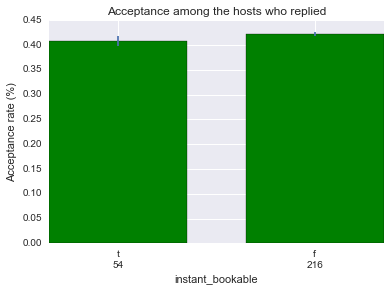

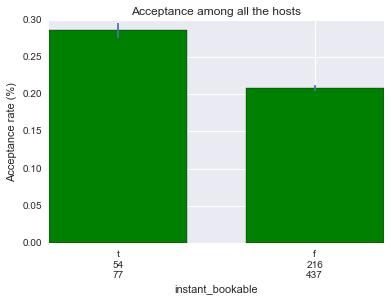

In [658]:
plot_percentage(acc_instant, "categorical")

## Orphan days and weeks in advance

In [659]:
#orphan 1 day

acc_1orph = acceptance_rate('bucket_name', ["days1_weeks1","days1_weeks2","days1_weeksM"])


Category: bucket_name  type: days1_weeks1 percentage over all replied: 0.266666666667
Category: bucket_name  type: days1_weeks1 percentage over all contacted: 0.0952380952381
Category: bucket_name  type: days1_weeks2 percentage over all replied: 0.541666666667
Category: bucket_name  type: days1_weeks2 percentage over all contacted: 0.302325581395
Category: bucket_name  type: days1_weeksM percentage over all replied: 0.44
Category: bucket_name  type: days1_weeksM percentage over all contacted: 0.255813953488


categorical
[0 1 2]
percentage:
[0.26666666666666666, 0.5416666666666666, 0.44]
size
['15', '24', '25']
std deviation:
[0.04529474910530199, 0.07003733626037717, 0.06653783233847355]


percentage:
[0.09523809523809523, 0.3023255813953488, 0.2558139534883721]
size
['42', '43', '43']
std deviation:
[0.04529474910530199, 0.07003733626037717, 0.06653783233847355]
average over all replied 0.416111111111
average over all contacted 0.217792543374


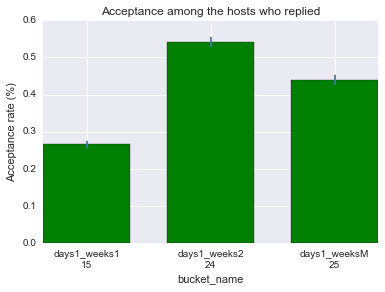

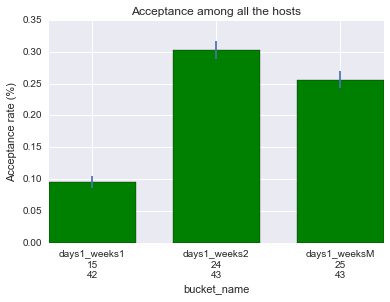

In [660]:
plot_percentage(acc_1orph, "categorical")

In [661]:
#orphan 2 day

acc_2orph = acceptance_rate('bucket_name', ["days2_weeks1","days2_weeks2","days2_weeksM"])


Category: bucket_name  type: days2_weeks1 percentage over all replied: 0.423076923077
Category: bucket_name  type: days2_weeks1 percentage over all contacted: 0.261904761905
Category: bucket_name  type: days2_weeks2 percentage over all replied: 0.52
Category: bucket_name  type: days2_weeks2 percentage over all contacted: 0.302325581395
Category: bucket_name  type: days2_weeksM percentage over all replied: 0.346153846154
Category: bucket_name  type: days2_weeksM percentage over all contacted: 0.209302325581


categorical
[0 1 2]
percentage:
[0.4230769230769231, 0.52, 0.34615384615384615]
size
['26', '25', '26']
std deviation:
[0.0678427203513798, 0.07003733626037717, 0.06203803448665818]


percentage:
[0.2619047619047619, 0.3023255813953488, 0.20930232558139536]
size
['42', '43', '43']
std deviation:
[0.0678427203513798, 0.07003733626037717, 0.06203803448665818]
average over all replied 0.429743589744
average over all contacted 0.257844222961


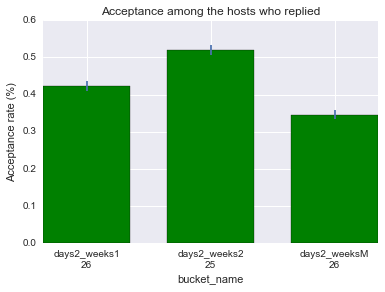

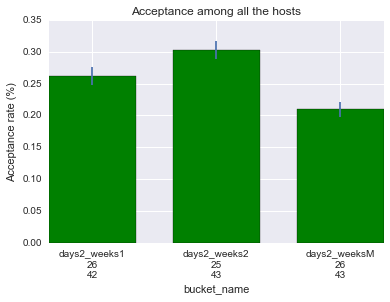

In [662]:
plot_percentage(acc_2orph, "categorical")

In [663]:
#orphan 3 day

acc_3orph= acceptance_rate('bucket_name', ["days3_weeks1","days3_weeks2","days3_weeksM"])


Category: bucket_name  type: days3_weeks1 percentage over all replied: 0.315789473684
Category: bucket_name  type: days3_weeks1 percentage over all contacted: 0.139534883721
Category: bucket_name  type: days3_weeks2 percentage over all replied: 0.4375
Category: bucket_name  type: days3_weeks2 percentage over all contacted: 0.162790697674
Category: bucket_name  type: days3_weeksM percentage over all replied: 0.541666666667
Category: bucket_name  type: days3_weeksM percentage over all contacted: 0.302325581395


categorical
[0 1 2]
percentage:
[0.3157894736842105, 0.4375, 0.5416666666666666]
size
['19', '16', '24']
std deviation:
[0.052841337752619726, 0.056298598938553185, 0.07003733626037717]


percentage:
[0.13953488372093023, 0.16279069767441862, 0.3023255813953488]
size
['43', '43', '43']
std deviation:
[0.052841337752619726, 0.056298598938553185, 0.07003733626037717]
average over all replied 0.431652046784
average over all contacted 0.201550387597


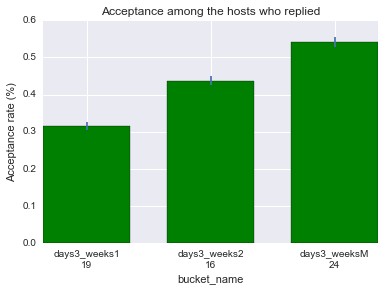

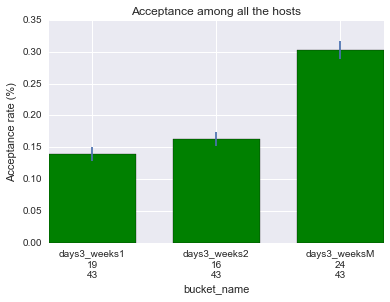

In [664]:
plot_percentage(acc_3orph, "categorical")

In [665]:
# non orphan

acc_nonorph= acceptance_rate('bucket_name', ["daysM_weeks1","daysM_weeks2","daysM_weeksM"])


Category: bucket_name  type: daysM_weeks1 percentage over all replied: 0.409090909091
Category: bucket_name  type: daysM_weeks1 percentage over all contacted: 0.209302325581
Category: bucket_name  type: daysM_weeks2 percentage over all replied: 0.407407407407
Category: bucket_name  type: daysM_weeks2 percentage over all contacted: 0.255813953488
Category: bucket_name  type: daysM_weeksM percentage over all replied: 0.285714285714
Category: bucket_name  type: daysM_weeksM percentage over all contacted: 0.139534883721


categorical
[0 1 2]
percentage:
[0.4090909090909091, 0.4074074074074074, 0.2857142857142857]
size
['22', '27', '21']
std deviation:
[0.06203803448665818, 0.06653783233847355, 0.052841337752619726]


percentage:
[0.20930232558139536, 0.2558139534883721, 0.13953488372093023]
size
['43', '43', '43']
std deviation:
[0.06203803448665818, 0.06653783233847355, 0.052841337752619726]
average over all replied 0.367404200738
average over all contacted 0.201550387597


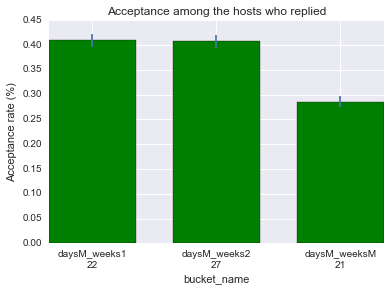

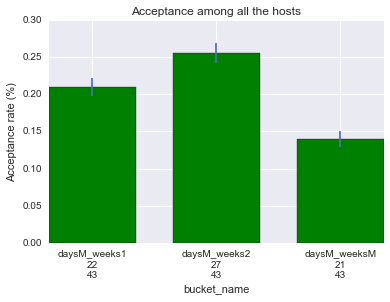

In [666]:
plot_percentage(acc_nonorph, "categorical")

In [667]:
#1 week in advance
acc_1w= acceptance_rate('bucket_name', ["days1_weeks1","days2_weeks1","days3_weeks1", "daysM_weeks1"])

    

Category: bucket_name  type: days1_weeks1 percentage over all replied: 0.266666666667
Category: bucket_name  type: days1_weeks1 percentage over all contacted: 0.0952380952381
Category: bucket_name  type: days2_weeks1 percentage over all replied: 0.423076923077
Category: bucket_name  type: days2_weeks1 percentage over all contacted: 0.261904761905
Category: bucket_name  type: days3_weeks1 percentage over all replied: 0.315789473684
Category: bucket_name  type: days3_weeks1 percentage over all contacted: 0.139534883721
Category: bucket_name  type: daysM_weeks1 percentage over all replied: 0.409090909091
Category: bucket_name  type: daysM_weeks1 percentage over all contacted: 0.209302325581


categorical
[0 1 2 3]
percentage:
[0.26666666666666666, 0.4230769230769231, 0.3157894736842105, 0.4090909090909091]
size
['15', '26', '19', '22']
std deviation:
[0.04529474910530199, 0.0678427203513798, 0.052841337752619726, 0.06203803448665818]


percentage:
[0.09523809523809523, 0.2619047619047619, 0.13953488372093023, 0.20930232558139536]
size
['42', '42', '43', '43']
std deviation:
[0.04529474910530199, 0.0678427203513798, 0.052841337752619726, 0.06203803448665818]
average over all replied 0.35365599313
average over all contacted 0.176495016611


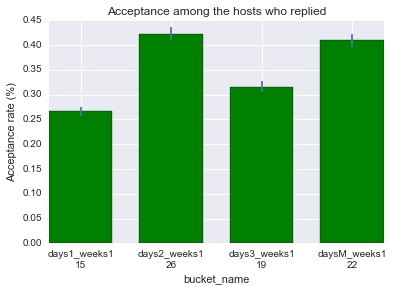

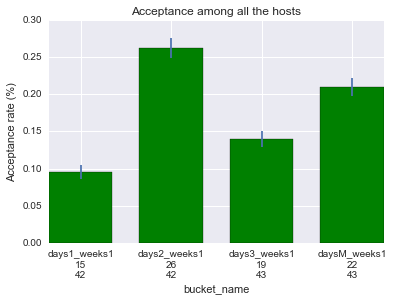

In [668]:
plot_percentage(acc_1w, "categorical")

In [669]:
#2 weeks in advance
acc_2w= acceptance_rate('bucket_name', ["days1_weeks2","days2_weeks2","days3_weeks2", "daysM_weeks2"])


Category: bucket_name  type: days1_weeks2 percentage over all replied: 0.541666666667
Category: bucket_name  type: days1_weeks2 percentage over all contacted: 0.302325581395
Category: bucket_name  type: days2_weeks2 percentage over all replied: 0.52
Category: bucket_name  type: days2_weeks2 percentage over all contacted: 0.302325581395
Category: bucket_name  type: days3_weeks2 percentage over all replied: 0.4375
Category: bucket_name  type: days3_weeks2 percentage over all contacted: 0.162790697674
Category: bucket_name  type: daysM_weeks2 percentage over all replied: 0.407407407407
Category: bucket_name  type: daysM_weeks2 percentage over all contacted: 0.255813953488


categorical
[0 1 2 3]
percentage:
[0.5416666666666666, 0.52, 0.4375, 0.4074074074074074]
size
['24', '25', '16', '27']
std deviation:
[0.07003733626037717, 0.07003733626037717, 0.056298598938553185, 0.06653783233847355]


percentage:
[0.3023255813953488, 0.3023255813953488, 0.16279069767441862, 0.2558139534883721]
size
['43', '43', '43', '43']
std deviation:
[0.07003733626037717, 0.07003733626037717, 0.056298598938553185, 0.06653783233847355]
average over all replied 0.476643518519
average over all contacted 0.255813953488


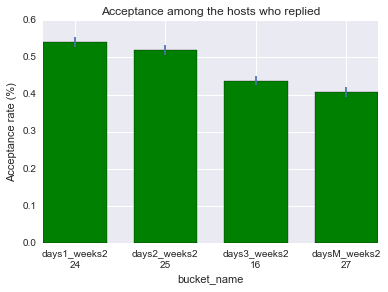

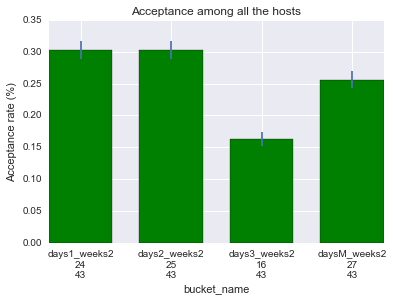

In [670]:
plot_percentage(acc_2w, "categorical")

In [671]:
#more weeks in advance
acc_mw= acceptance_rate('bucket_name', ["days1_weeksM","days2_weeksM","days3_weeksM", "daysM_weeksM"])


Category: bucket_name  type: days1_weeksM percentage over all replied: 0.44
Category: bucket_name  type: days1_weeksM percentage over all contacted: 0.255813953488
Category: bucket_name  type: days2_weeksM percentage over all replied: 0.346153846154
Category: bucket_name  type: days2_weeksM percentage over all contacted: 0.209302325581
Category: bucket_name  type: days3_weeksM percentage over all replied: 0.541666666667
Category: bucket_name  type: days3_weeksM percentage over all contacted: 0.302325581395
Category: bucket_name  type: daysM_weeksM percentage over all replied: 0.285714285714
Category: bucket_name  type: daysM_weeksM percentage over all contacted: 0.139534883721


categorical
[0 1 2 3]
percentage:
[0.44, 0.34615384615384615, 0.5416666666666666, 0.2857142857142857]
size
['25', '26', '24', '21']
std deviation:
[0.06653783233847355, 0.06203803448665818, 0.07003733626037717, 0.052841337752619726]


percentage:
[0.2558139534883721, 0.20930232558139536, 0.3023255813953488, 0.13953488372093023]
size
['43', '43', '43', '43']
std deviation:
[0.06653783233847355, 0.06203803448665818, 0.07003733626037717, 0.052841337752619726]
average over all replied 0.403383699634
average over all contacted 0.226744186047


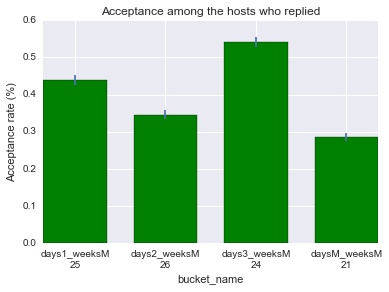

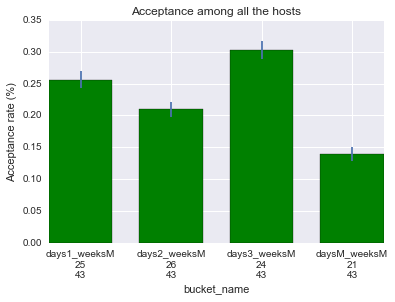

In [672]:
plot_percentage(acc_mw, "categorical")